In [1]:
import pandas as pd
set2d=pd.read_csv('Simple2DSet.csv')
print(len(set2d))
set2d.head(10)

1000


,x,y
0,6.403621,-0.742478
1,2.782241,-4.126082
2,6.354109,-2.308102
3,5.499853,-1.986180
4,5.492006,-5.074300
5,3.393425,-4.843538
6,4.563651,-3.629893
7,4.731351,-4.335860
8,2.247755,-6.214266
9,6.028582,-3.422748


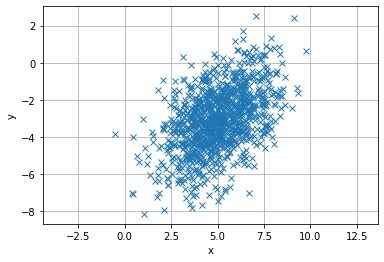

In [2]:
from matplotlib import pyplot as plt
plt.plot(set2d.x,set2d.y,'x')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.decomposition import PCA

In [4]:
X = set2d.values
pca = PCA()
pca.fit(X)

PCA()

In [5]:
print("        Colonna x | Colonna y")
pca.mean_

        Colonna x | Colonna y


array([ 4.98240411, -3.09411727])

In [6]:
set2d.mean()

x    4.982404
y   -3.094117
dtype: float64

In [7]:
W=pca.components_
W

array([[ 0.64514558,  0.76405967],
       [ 0.76405967, -0.64514558]])

[[ 2.71368403 -0.43125527]
 [-2.20790789 -1.01528865]
 [ 1.48551234  0.54096994]
 ...
 [ 4.7336723  -0.55968038]
 [ 3.30017269  0.33160425]
 [ 1.99057612  2.00707296]]


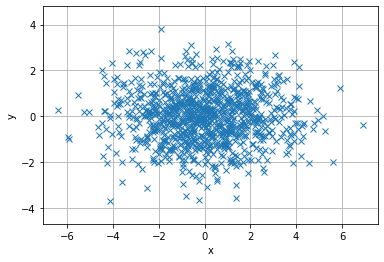

In [9]:
Z = pca.transform(X)
print(Z)
from matplotlib import pyplot as plt
plt.plot(Z[:,0],Z[:,1],'x')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
(W**2).sum(0) #norma uguale a 1

array([1., 1.])

W[0][0] 0.6451455757480251
W[0][1] 0.7640596744317484
W[1][0] 0.7640596744317484
W[1][1] -0.6451455757480251


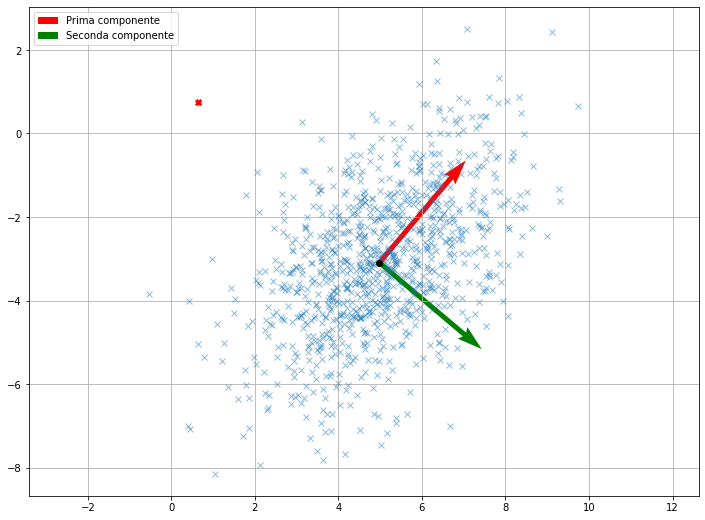

In [12]:
plt.figure(figsize=(12,9))
#specifico alpha=0.5 per visualizzare i punti in trasparenza
plt.plot(set2d.x,set2d.y,'x',alpha=0.5)
#uso la funzione quiver per plottere i vettori
plt.plot(set2d.x.mean(),set2d.y.mean(),'o',color='black',)
plt.plot(W[0][0],W[1][0],'X',color='red',)

print("W[0][0]",W[0,0])
print("W[0][1]",W[0,1])
print("W[1][0]",W[1,0])
print("W[1][1]",W[1,1])

plt.quiver(set2d.x.mean(),set2d.y.mean(),W[0,0],W[1,0], scale=5, color='red', label='Prima componente')
plt.quiver(set2d.x.mean(),set2d.y.mean(),W[0,1],W[1,1], scale=5, color='green', label='Seconda componente')
#impongo che gli assi abbiano la stessa scala
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

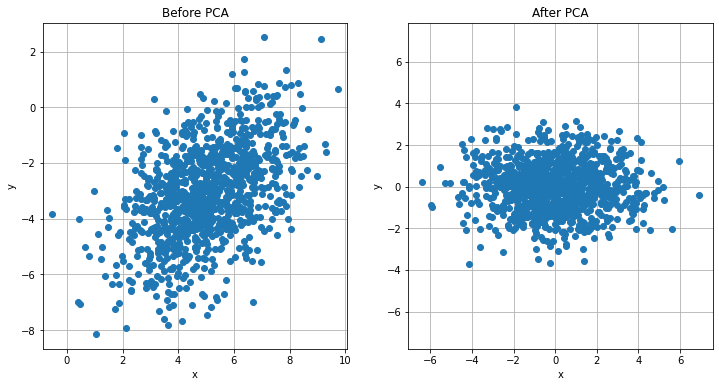

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Before PCA')
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.title('After PCA')
plt.plot(Z[:,0],Z[:,1],'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
import numpy as np
print(np.cov(X.T))
print()
print(np.cov(Z.T))

[[2.45531835 1.25551632]
 [1.25551632 2.88213855]]

[[3.94225312e+00 3.76964615e-16]
 [3.76964615e-16 1.39520377e+00]]


In [15]:
pca1d = PCA(n_components=1)
pca1d.fit(X)

PCA(n_components=1)

In [16]:
pca1d.components_

array([[0.64514558, 0.76405967]])

In [17]:
print(pca1d.components_,"\n")
print(pca.components_)

[[0.64514558 0.76405967]] 

[[ 0.64514558  0.76405967]
 [ 0.76405967 -0.64514558]]


In [19]:
Z1 = pca1d.transform(X)
print(Z1.shape)
print(Z1[:5])
print(set2d.x[:5])
print(set2d.y[:5])


(1000, 1)
[[ 2.71368403]
 [-2.20790789]
 [ 1.48551234]
 [ 1.1803606 ]
 [-1.18421018]]
0    6.403621
1    2.782241
2    6.354109
3    5.499853
4    5.492006
Name: x, dtype: float64
0   -0.742478
1   -4.126082
2   -2.308102
3   -1.986180
4   -5.074300
Name: y, dtype: float64


In [20]:
#sommiamo le varianze delle due variabili per ottenere la varianza totale
varianza_totale = set2d.x.var()+set2d.y.var()
varianza_mantenuta = np.var(Z1)

#moltiplichiamo per cento per ottenere un valore in percentuale
print("Percentuale di varianza mantenuta: %0.2f%%" % (varianza_mantenuta*100/varianza_totale))
print("Percentuale di varianza persa: %0.2f%%" % (100-varianza_mantenuta*100/varianza_totale))

Percentuale di varianza mantenuta: 73.79%
Percentuale di varianza persa: 26.21%


In [22]:
pca.explained_variance_ratio_
import numpy as np
print(" Varianza usando 1 componente|Varianza usando 2 componenti")
np.cumsum(pca.explained_variance_ratio_)


 Varianza usando 1 componente|Varianza usando 2 componenti


array([0.7386014, 1.       ])

Dimensioni dell'immagine: (427, 640, 3)
Numero di dimensioni: 819840


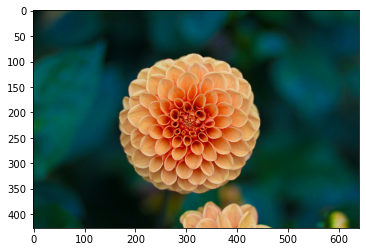

In [23]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')
print("Dimensioni dell'immagine:",flower.shape)
print("Numero di dimensioni:",np.prod(flower.shape))
plt.imshow(flower)
plt.show()

In [24]:
flower_monodimensionale = flower.ravel() ## to a vector
print(flower_monodimensionale.size)

819840


In [25]:
flower_monodimensionale.size/(8*8*3)

4270.0

In [26]:
tiles = np.split(flower.ravel(),4270)
tiles=np.stack(tiles)
tiles.shape

(4270, 192)

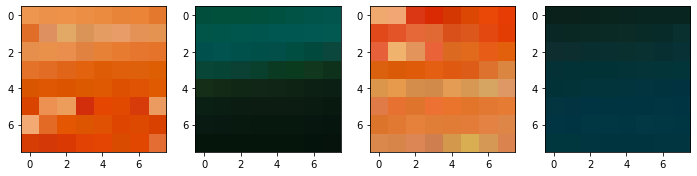

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(141)
plt.imshow(tiles[1634].reshape(8,8,3))
plt.subplot(142)
plt.imshow(tiles[3200].reshape(8,8,3))
plt.subplot(143)
plt.imshow(tiles[1635].reshape(8,8,3))
plt.subplot(144)
plt.imshow(tiles[450].reshape(8,8,3))
plt.show()

In [28]:
pca=PCA()
pca.fit(tiles)

PCA()

In [29]:
np.cumsum(pca.explained_variance_ratio_)[:32] #stampiamo solo i valori relativi alle prime 32 componenti

array([0.72033322, 0.8054948 , 0.88473857, 0.91106289, 0.92773705,
       0.94002709, 0.94742984, 0.95262262, 0.95724086, 0.96138203,
       0.96493482, 0.96813026, 0.97074765, 0.97304417, 0.97502487,
       0.97676849, 0.97827393, 0.97961611, 0.98080084, 0.98195037,
       0.98298693, 0.98399279, 0.98491245, 0.98570784, 0.98649079,
       0.98719466, 0.98779928, 0.98835152, 0.98888528, 0.98937606,
       0.98983658, 0.99027875])

In [30]:
pca = PCA(n_components=32)
pca.fit(tiles)
compressed_tiles = pca.transform(tiles)
compressed_tiles.shape

(4270, 32)

In [31]:
print("Spazio salvato nella compressione: {:0.2f}%".format(100-100*compressed_tiles.size/tiles.size))

Spazio salvato nella compressione: 83.33%


In [32]:
reconstructed_tiles = pca.inverse_transform(compressed_tiles)
reconstructed_tiles.shape

(4270, 192)

In [33]:
reconstructed_tiles = (reconstructed_tiles-reconstructed_tiles.min())\
            /(reconstructed_tiles.max()-reconstructed_tiles.min())*255
#convertiamo il tipo dei dati da float a uint8
reconstructed_tiles=reconstructed_tiles.astype('uint8')

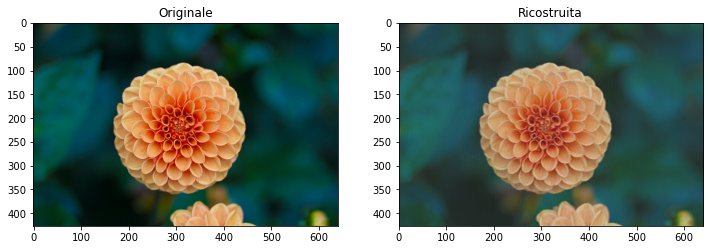

In [34]:
reconstructed_flower=reconstructed_tiles.ravel().reshape(flower.shape)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Originale')
plt.imshow(flower)
plt.subplot(1,2,2)
plt.title('Ricostruita')
plt.imshow(reconstructed_flower)
plt.show()

In [35]:
from sklearn.datasets import load_digits
digits=load_digits()

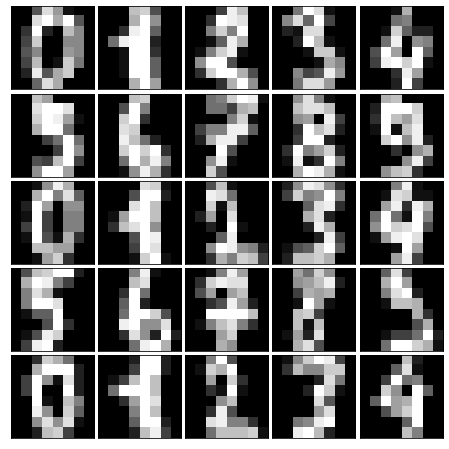

In [36]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap='gray')

Classe corrispondente: 4


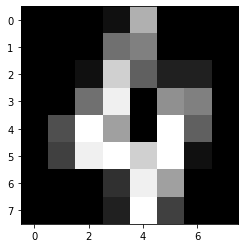

In [37]:
#gli elementi sono contenuti all'interno di digits.data
#si tratta di vettori 1x64, che devono essere trasformati in vettori 8x8 per la visualizzazione
plt.imshow(digits.data[4].reshape((8,8)),cmap='gray')
#le classi sono contenute all'interno di digits.target
print("Classe corrispondente:",digits.target[4])
plt.show()

In [44]:
#dato che vogliamo solo le prime due componenti principali
#possiamo specificare n_components=2
pca=PCA(n_components=2)
pca.fit(digits.data)
Y=pca.transform(digits.data) 
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771]


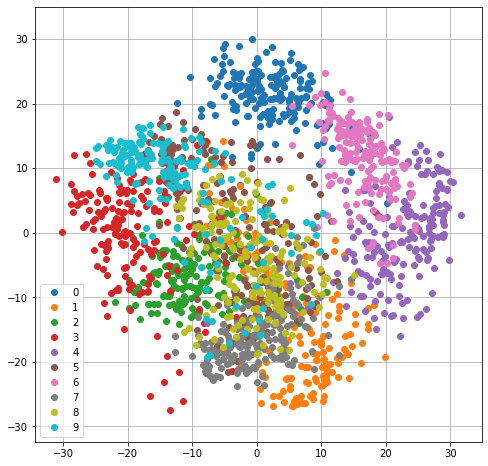

In [45]:
plt.figure(figsize=(8,8))
legend = []
for c in np.unique(digits.target):
    plt.plot(Y[digits.target==c,0],Y[digits.target==c,1],'o')
    legend.append(c)

plt.legend(legend)
plt.grid()
plt.axis('equal')
plt.show()

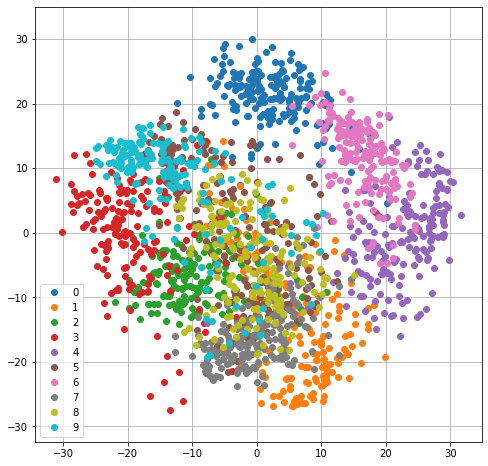

In [46]:
plt.figure(figsize=(8,8))
legend = []
for c in np.unique(digits.target):
    plt.plot(Y[digits.target==c,0],Y[digits.target==c,1],'o')
    legend.append(c)

plt.legend(legend)
plt.grid()
plt.axis('equal')
plt.show()

[[0.67876672 0.22978007]
 [0.22978007 0.09833763]]
Components  0.7587188433781987
Components  0.01838550603599479
(200, 1)
(200, 2)
[[-0.63918167 -0.22240368]
 [ 1.01171902  0.35202829]
 [-0.68748432 -0.23921062]
 [-2.18136454 -0.75900721]
 [-0.5950594  -0.2070513 ]]


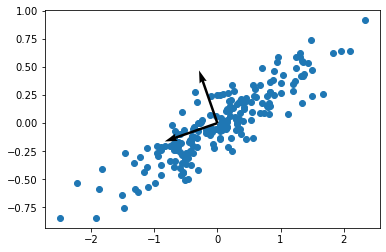

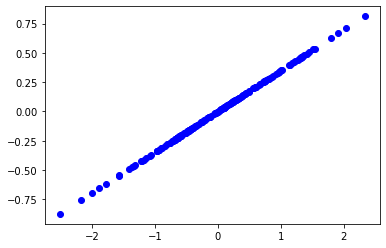

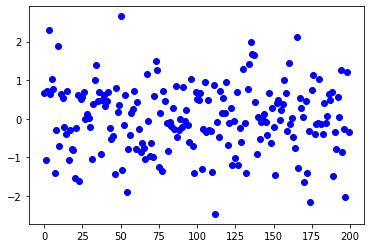

In [63]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


#alpha=0.6
#X=np.random.randn(100)
#Y=alpha*X+np.random.randn(100)+2
#X=np.hstack([X,Y])
#X=X.reshape(100,2)

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])


n_samples = X.shape[0]
X -= np.mean(X, axis=0)

cov_matrix = np.dot(X.T, X) / n_samples
print(cov_matrix)
pca=PCA(n_components=2)  
data=pca.fit_transform(X)

vectors=[]
eigen=[]
for eigenvector in pca.components_:
    print("Components ",np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    vectors.append(eigenvector)
    eigen.append(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
X_mean=np.mean(X,axis=0)
plt.quiver(X_mean[0],X_mean[1],vectors[0][0],vectors[1][0],scale=6)
plt.quiver(X_mean[0],X_mean[1],vectors[0][1],vectors[1][1],scale=6)


#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

pca=PCA(n_components=1)
data=pca.fit_transform(X)
reconstructed=pca.inverse_transform(data)
print(data.shape)

print(reconstructed.shape)
plt.figure()
plt.scatter(reconstructed[:,0],reconstructed[:,1],c='blue')
plt.figure()
plt.scatter(np.arange(len(data[:,0])),data[:,0],c='blue')

print(reconstructed[:5])